# Conditional Execution- Part 2

## Nested conditionals
One conditional can also be nested within another. We could have written the three-branch example like this:

In [ ]:
x = float(input("Enter a value for x: "))
y = float(input("Enter a value for y: "))

if x == y:
    print('x and y are equal')
else:
    if x < y:
        print('x is less than y')
    else:
        print('x is greater than y')

Enter a value for x: 4.5
Enter a value for y: 8.3
x is less than y


The outer conditional contains two branches. The first branch contains a simple statement. The second branch contains another if statement, which has two branches of its own. Those two branches are both simple statements, although they could have been conditional statements as well.

nested.svg

Nested If Statements

Although the indentation of the statements makes the structure apparent, nested conditionals become difficult to read very quickly.



In [ ]:
# Logical operators often provide a way to simplify nested conditional statements. For example, we can rewrite the following code using a single conditional:
x= 5
if 0 < x:
    if x < 10:
        print('x is a positive single-digit number.')

x is a positive single-digit number.


In [ ]:
# The print statement is executed only when we pass both conditionals. We can get the same effect with the and operator:

if 0 < x and x < 10:
    print('x is a positive single-digit number.')

x is a positive single-digit number.


Nested conditionals are useful when you need to check additional conditions **only if** a previous condition is true.

In [ ]:
age = int(input("Enter an age: "))
cost = float(input("Enter a cost: "))

if age > 21:
    if cost < 10:
        print("Buy")
    else:
        print("Too expensive")
else:
    print("Too young")


Enter an age: 24
Enter a cost: 100
Too expensive


**What if there is one more condition?**

Nested Conditions

* Outer Condition: `if age > 21`

  * This checks if the age is greater than 21. If true, it proceeds to the nested condition; if false, it prints `Too young`.
* Inner Condition: if cost < 10

  * This is nested inside the outer if statement. It checks if the cost is less than 10, but only if the age condition is true. If true, it prints "Buy"; otherwise, it prints `Too expensive`.

Branches

In this code, there are a total of three branches:

* Branch 1: When `age > 21` and `cost < 10`

 * Executes `print("Buy")`
* Branch 2: When `age > 21` and `cost >= 10`

 * Executes print("Too expensive")

* Branch 3: When `age <= 21`

 * Executes `print("Too young")`

 The reason that there are three branches is because the first branch is divided into two parts. In other words, each new if only adds one new branch to the existing number of branches. The following diagram overlays the paths of the branches.

 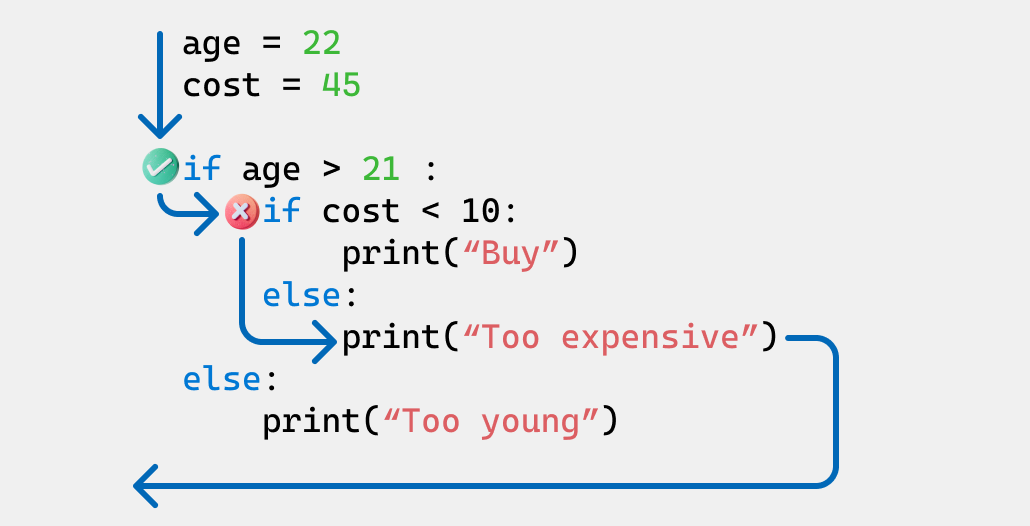

Why Not Use if, elif, elif Here?
If you were to rewrite this using `if`, `elif`, and `else`, it would look like this:

In [ ]:
age = int(input("Enter an age: "))
cost = float(input("Enter a cost: "))

if age > 21 and cost < 10:
    print("Buy")
elif age > 21 and cost >= 10:
    print("Too expensive")
else:
    print("Too young")

Enter an age: 15
Enter a cost: 20
Too young


While this works, it has some downsides:

- Redundant Checks: You're checking `age > 21` twice, which is unnecessary.

- Less Readable: The logic becomes less clear because the relationship between the conditions is not as obvious.

- Longer Code: It requires more lines and repeated conditions, making it less concise.

## Catching exceptions using try and except
If you place this code in a Python script and this error occurs, your script immediately stops in its tracks with a traceback. It does not execute the following statement.

Here is a sample program to convert a Fahrenheit temperature to a Celsius temperature:

In [ ]:
inp = input('Enter Fahrenheit Temperature: ')
fahr = float(inp)
cel = (fahr - 32.0) * 5.0 / 9.0
print(cel)                                      #If we execute this code and give it invalid input, it simply fails with an unfriendly error message

Enter Fahrenheit Temperature: abc


ValueError: could not convert string to float: 'abc'

There is a conditional execution structure built into Python to handle these types of expected and unexpected errors called “try / except”. The purpose of `try` and `except` is that you know that some sequence of instruction(s) may have a problem and you want to add some statements to be executed if an error occurs. These extra statements (the except block) are ignored if there is no error.

You can think of the `try` and `except` feature in Python as an “insurance policy” on a sequence of statements.

We can rewrite our temperature converter as follows:

In [ ]:
inp = input('Enter Fahrenheit Temperature:')
try:
    fahr = float(inp)
    cel = (fahr - 32.0) * 5.0 / 9.0
    print(cel)
except:
    print('Please enter a number')


Enter Fahrenheit Temperature:abc
Please enter a number


Handling an exception with a `try` statement is called catching an exception. In this example, the `except` clause prints an error message. In general, catching an exception gives you a chance to fix the problem, or try again, or at least end the program gracefully.

In [ ]:
year_str = input("What year is it? ")

try:

    year = int(year_str)

except:

    print("INVALID INPUT")

    exit()   # EARLY EXIT STRATEGY

What year is it? abc
INVALID INPUT


In [ ]:
# Option 2

try:

    year = int(input("What year is it? "))

except:

    print("INVALID INPUT")

    exit() # EARLY EXIT STRATEGY

What year is it? 10 / "2"
INVALID INPUT


In [ ]:
# Catches a ValueError
try:
    x = int(input("What's x? "))
    print(f"x is {x}")
except ValueError:
    print("x is not an integer")

## Short-circuit evaluation of logical expressions

When Python is processing a logical expression such as `x >= 2 and (x/y) > 2`, it evaluates the expression from left to right. Because of the definition of `and`, if `x` is less than 2, the expression `x >= 2` is `False` and so the whole expression is `False` regardless of whether `(x/y) > 2` evaluates to `True` or `False`.

When Python detects that there is nothing to be gained by evaluating the rest of a logical expression, it stops its evaluation and does not do the computations in the rest of the logical expression. When the evaluation of a logical expression stops because the overall value is already known, it is called short-circuiting the evaluation.

The short-circuit behavior leads to a clever technique called the *guardian pattern*. Consider the following code sequence in the Python interpreter:

In [ ]:
x = 6
y = 2
x >= 2 and (x/y) > 2


True

In [ ]:
x = 1
y = 0
x >= 2 and (x/y) > 2

False

In [ ]:
x = 6
y = 0
x >= 2 and (x/y) > 2

ZeroDivisionError: division by zero

The third calculation failed because Python was evaluating `(x/y)` and `y` was zero, which causes a runtime error. But the first and the second examples did not fail because in the first calculation `y` was non zero and in the second one the first part of these expressions `x >= 2` evaluated to `False` so the `(x/y)` was not ever executed due to the short-circuit rule and there was no error.

We can construct the logical expression to strategically place a *guard evaluation* just before the evaluation that might cause an error as follows:

In [ ]:
x = 1
y = 0
x >= 2 and y != 0 and (x/y) > 2


False

In [ ]:
x = 6
y = 0
x >= 2 and y != 0 and (x/y) > 2

False

In [ ]:
x= 10
y= 0
x >= 2 and (x/y) > 2 and y != 0

ZeroDivisionError: division by zero

In the first logical expression, `x >= 2` is `False` so the evaluation stops at the `and`. In the second logical expression, `x >= 2` is `True` but `y != 0` is `False` so we never reach `(x/y)`.

In the third logical expression, the `y != 0` is after the `(x/y)` calculation so the expression fails with an error.

In the second expression, we say that `y != 0` acts as a *guard* to insure that we only execute `(x/y)` if `y` is non-zero.

## Debugging
The traceback Python displays when an error occurs contains a lot of information, but it can be overwhelming. The most useful parts are usually:

* What kind of error it was, and

* Where it occurred.

Syntax errors are usually easy to find, but there are a few gotchas. Whitespace errors can be tricky because spaces and tabs are invisible and we are used to ignoring them.

In [ ]:
x = 5
  y = 6

IndentationError: unexpected indent (<ipython-input-23-caa1f43fbdb6>, line 2)

In this example, the problem is that the second line is indented by one space. But the error message points to y, which is misleading. In general, error messages indicate where the problem was discovered, but the actual error might be earlier in the code, sometimes on a previous line.

In general, error messages tell you where the problem was discovered, but that is often not where it was caused.

## Logical Patterns
*VSCE Testbook*

Since if statements are so useful, they can be a little overwhelming when you get started. This lesson gives some examples of patterns that can help guide your thinking about using if statements in different ways.

* And vs. Nested If
* Defensive Guard
* Early Return
* Multiple Return Spots
* Build-Up-Return
* Define-and-Refine

These patterns are not officially part of the Python language.

They are merely templates that we have created based on common patterns we see in code. They are not exhaustive since there are many ways to leverage and twist conditionals. But if you treat them as starting points, you may find that they inspire you in different directions.

### And vs Nested If
An `if` statement nested inside of an `if` statement is equivalent to having both conditions combined with an `and` statement. The advantage of an `and` expression is usually brevity since the code will only take up a single line without an extra indentation.

The advantage of the nested `if` statement, however, is a little more nuanced. Statements can be added before or after the inner `if` statement, allowing more statements for the first case but not necessarily for the second.

You can also specify additional cases' behavior by adding in `elif` and `else` statements to the inner `if` statements if you need to narrow the behavior further in the case where the first condition is true and the second condition is false.

```python
if __A__ and __B__:
    # ...

# Is the same as...

if __A__:
    if __B__:
        # ...
```

As a concrete example, observe the following code. The first version has to have redundant versions of the `weather.lower()` check. The second version has an extra line of code because of the second `if` statement. Just because a program takes fewer lines of code does not mean that that solution is more readable; with less redundant logic, the second block of code is less likely to have typos once you get used to reading nested `if` statements.

In [3]:
weather = input("enter:") # Add this line to define the variable weather
temperature = 75 # Add this line to define the variable temperature

if weather.lower() == 'sunny' and temperature > 70:
    print("Warm!")
if weather.lower() == 'sunny' and temperature < 30:
    print("Cold!")

# Is the same as...

if weather.lower() == 'sunny':
    if temperature > 70:
        print("Warm!")
    if temperature < 30:
        print("Cold!")

enter:75


The code only considers scenarios where weather is 'sunny'. If the weather is not 'sunny', the nested if statements are simply skipped, and no action is taken. This is acceptable when you only want to handle cases where a specific condition (in this case, weather being 'sunny') is true and don’t need to account for what happens when it’s not true.

Using `else` for Complete Coverage

In [ ]:
weather = input("enter:") # Add this line to define the variable weather
temperature = 75 # Add this line to define the variable temperature

if weather.lower() == 'sunny':
    if temperature > 70:
        print("Warm!")
    if temperature < 30:
        print("Cold!")
else:
    print("Not sunny today.")


### Defensive Guard
There are operations and functions which are valid syntactically but will cause an error in practice. The Defensive Guard pattern is just the concept of "protecting" those operations from occurring by first checking that the data involved is valid. The pattern is simple:
```python
if ___:
    # Potentially unsafe operation
```

A classic example is division by zero, which causes a `ZeroDivisionError`. Using an if statement, you can make sure that a variable such as `time` is greater than zero and therefore safe to use for the denominator.

In [ ]:
time = int(input("Enter time: "))
distance = 100
# Guard against division by zero
if time > 0:
    speed = distance / time
    print(speed)

Enter time: 20
5.0


### Early Return
The Early Return pattern is like the Defensive Guard pattern, with an `if` statement ending a path inside of a function before an error (or other undesirable operation) can occur.
```python
# Early Return
def function(___):
    if ___:
        return ___
    # do something ...
    return ___
```

In the following example, we check if the `message` parameter does not have a truthy value. For a string, any non-empty string will be considered truthy. In this case, then, indexing is only attempted if the `message` is not empty. This is very important, since indexing the last character of the string will cause an `IndexError` if the empty string was indexed.

The early return prevents the mistake from occurring, allowing us to safely use the logic in the rest of the function to determine what kind of punctuation symbol the last character of the string holds.

In [ ]:
def get_punctuation(message: str) -> str:
    if not message:                         # If not message: the function determines if the message is empty
        return "empty string"               # If the message is empty, trying to access message[-1] would cause an IndexError because there is no character to index.
    last_character = message[-1]
    if last_character == "?":
        return "question"
    elif last_character == ".":
        return "statement"
    return "other"

# Test cases
print(get_punctuation("Hello, how are you?"))
print(get_punctuation("This is a sentence."))
print(get_punctuation("Hello"))
print(get_punctuation(""))


question
statement
other
empty string


### Mutiple Return Spots

Refer to more details in VSCE textbook

### Build-up-Return Pattern

Refer to more details in VSCE textbook

### Define-and-Refine Pattern

The `else` statement is a powerful way to specify default behavior after `if` and `elif` statements. But, when nesting these statements, the `else` branch is not always conveniently available. The nested statements represent specific, narrow cases involving multiple conditions.

To provide a default situation with `else` statements, every single level of nested `if` would need to have an `else` statement, sometimes leading to redundant code.

However, the Define-and-Refine pattern allows you to specify an initial value (the default) for a variable and then only specify the branches to change that value.

```python
if ___:
    if ___:
        value = __special__
    else:
        value = __default__
else:
    value = __default__

# Becomes

value = __default__
if ___:
    if ___:
        value = __special__
```

Following is an example that is easier to read when the Define-and-Refine pattern is used instead of having an `else` statement for every `if` statement. By initializing a default value for `weather`, we avoid having any `else` statements.

With Nested `if` and `else`:

In [ ]:
# Sample values for demonstration
temperature = 75
rainfall = 0

# Default weather
weather = 'unpleasant'

if temperature > 50:
    if temperature < 80:
        if rainfall == 0:
            weather = 'nice'
            print(weather)
        else:
            weather = 'unpleasant' # Redundant, since it's already 'unpleasant'
    else:
        weather = 'unpleasant' # Redundant, since it's already 'unpleasant'
else:
    weather = 'unpleasant' # Redundant, since it's already 'unpleasant'


nice


In [ ]:
# Sample values for demonstration
temperature = 75
rainfall = 0

# Default weather
weather = 'unpleasant'


if temperature > 50:
    if temperature < 80:
        if rainfall == 0:
            weather = 'nice'
            print(weather)

# Or equivalently
weather = 'unpleasant'
if temperature > 50 and temperature < 80 and rainfall == 0:
    weather = 'nice'
    print(weather)

nice
nice


In the Define-and-Refine pattern, you initialize a default value once, then refine it based on conditions. This approach avoids the need for else branches, simplifying your code and improving its clarity.

The variable will only change if the specified conditions are met, otherwise, it retains the default value you initialized.